# K-Means Algorithm Demo

_Source: 🤖[Homemade Machine Learning](https://github.com/trekhleb/homemade-machine-learning) repository_

> ☝Before moving on with this demo you might want to take a look at:
> - 📗[Math behind the K-Means Algorithm](https://github.com/trekhleb/homemade-machine-learning/tree/master/homemade/k_means)
> - ⚙️[K-Means Algorithm Source Code](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/k_means/k_means.py)

**K-means clustering** aims to partition _n_ observations into _K_ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

> **Demo Project:** In this example we will try to cluster Iris flowers into tree categories that we don't know in advance based on `petal_length` and `petal_width` parameters using K-Means unsupervised learning algorithm.

In [1]:
# To make debugging of logistic_regression module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of logistic_regression library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

### Import Dependencies

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [k_means](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/k_means/k_means.py) - custom implementation of K-Means algorithm

In [2]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom k-means implementation.
from homemade.k_means import KMeans

### Load the Data

In this demo we will use [Iris data set](http://archive.ics.uci.edu/ml/datasets/Iris).

The data set consists of several samples from each of three species of Iris (`Iris setosa`, `Iris virginica` and `Iris versicolor`). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, [Ronald Fisher](https://en.wikipedia.org/wiki/Iris_flower_data_set) developed a linear discriminant model to distinguish the species from each other.

In [3]:
# Load the data.
data = pd.read_csv('../../data/iris.csv')

# Print the data table.
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
5,5.4,3.9,1.7,0.4,SETOSA
6,4.6,3.4,1.4,0.3,SETOSA
7,5.0,3.4,1.5,0.2,SETOSA
8,4.4,2.9,1.4,0.2,SETOSA
9,4.9,3.1,1.5,0.1,SETOSA


### Plot the Data

Let's take two parameters `petal_length` and `petal_width` for each flower into consideration and plot the dependency of the Iris class on these two parameters.

Since we have an advantage of knowing the actual flower labels (classes) let's illustrate the real-world classification on the plot. But K-Means algorithm is an example of unsuervised learning algorithm which means that this algorithm doesn't need to know about labels. Thus below in this demo we will try to split Iris flowers into unknown clusters and compare the result of such split with the actual flower classification.

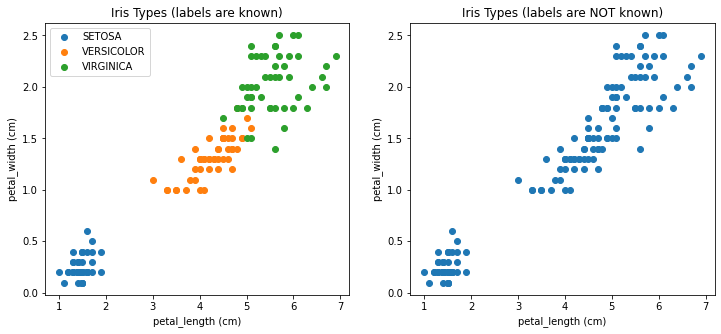

In [4]:
# List of suppported Iris classes.
iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Pick the Iris parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(12, 5))

# Plot the scatter for every type of Iris.
# This is the case when we know flower labels in advance.
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types (labels are known)')
plt.legend()

# Plot non-classified scatter of Iris flowers.
# This is the case when we don't know flower labels in advance.
# This is how K-Means sees the dataset.
plt.subplot(1, 2, 2)
plt.scatter(
    data[x_axis][:],
    data[y_axis][:],
)
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types (labels are NOT known)')

# Plot all subplots.
plt.show()

### Prepara the Data for Training

Let's extract `petal_length` and `petal_width` data and form a training feature set.

In [5]:
# Get total number of Iris examples.
num_examples = data.shape[0]

# Get features.
x_train = data[[x_axis, y_axis]].values.reshape((num_examples, 2))

### Init and Train Logistic Regression Model

> ☝🏻This is the place where you might want to play with model configuration.

- `num_clusters` - number of clusters into which we want to split our training dataset.
- `max_iterations` - maximum number of training iterations.

In [6]:
# Set K-Means parameters.
num_clusters = 3  # Number of clusters into which we want to split our training dataset.
max_iterations = 50  # maximum number of training iterations.

# Init K-Means instance.
k_means = KMeans(x_train, num_clusters)

# Train K-Means instance.
(centroids, closest_centroids_ids) = k_means.train(max_iterations)

# Plot the Clustering Results

Now let's plot the original Iris flow classification along with our unsupervised K-Means clusters to see how the algorithm performed.

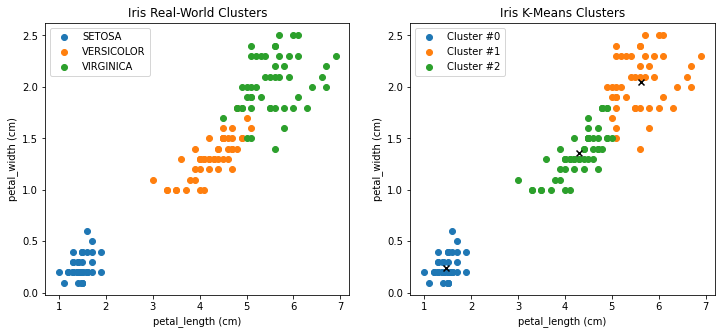

In [7]:
# List of suppported Iris classes.
iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Pick the Iris parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(12, 5))

# Plot ACTUAL Iris flower classification.
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )

plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Real-World Clusters')
plt.legend()

# Plot UNSUPERWISED Iris flower classification.
plt.subplot(1, 2, 2)
for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (closest_centroids_ids == centroid_id).flatten()
    plt.scatter(
        data[x_axis][current_examples_indices],
        data[y_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )

# Plot clusters centroids.
for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris K-Means Clusters')
plt.legend()

# Show all subplots.
plt.show()